# **Exucute Query using the NEIVA Database**

**1. Setting up the NEIVA database in the colab environment**

In [ ]:
!pip install mysql-connector-python # Install the necessary package to connect Python with MySQL databases.
!pip install pubchempy
!pip install pymysql
!apt-get -y install mysql-server    # Install the MySQL server on the Colab environment.
!service mysql start                # With MySQL install, this starts the server.

# Setting the password. Here 'root' is used as password.

!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH 'mysql_native_password' BY 'root';FLUSH PRIVILEGES;"

In [2]:
!rm -rf NEIVA

In [ ]:
!git clone https://github.com/NEIVA-BB-emissions-Inventory/NEIVA.git

In [4]:
!ls NEIVA/data

backend_db.sql	CSV_files  legacy_db.sql  neiva_output_db.sql  primary_db.sql  raw_db.sql


In [ ]:
!mysql -u root -proot -e "CREATE DATABASE IF NOT EXISTS backend_db"
!mysql -u root -proot backend_db < NEIVA/data/backend_db.sql
!mysql -u root -proot -e "CREATE DATABASE IF NOT EXISTS legacy_db"
!mysql -u root -proot legacy_db < NEIVA/data/legacy_db.sql
!mysql -u root -proot -e "CREATE DATABASE IF NOT EXISTS neiva_output_db"
!mysql -u root -proot neiva_output_db < NEIVA/data/neiva_output_db.sql
!mysql -u root -proot -e "CREATE DATABASE IF NOT EXISTS primary_db"
!mysql -u root -proot primary_db < NEIVA/data/primary_db.sql
!mysql -u root -proot -e "CREATE DATABASE IF NOT EXISTS raw_db"
!mysql -u root -proot raw_db < NEIVA/data/raw_db.sql

**2. Demonstrating the databases and contents of database using MySQL syntax.**

In [20]:
!mysql -u root -proot -e "show databases";

mysql: [Warning] Using a password on the command line interface can be insecure.
+--------------------+
| Database           |
+--------------------+
| backend_db         |
| information_schema |
| legacy_db          |
| mysql              |
| neiva_output_db    |
| performance_schema |
| primary_db         |
| raw_db             |
| sys                |
+--------------------+


In [34]:
!mysql -u root -proot -e "use primary_db; show tables;"

mysql: [Warning] Using a password on the command line interface can be insecure.
+---------------------------------+
| Tables_in_primary_db            |
+---------------------------------+
| pdb_akagi11_boreal_forest       |
| pdb_akagi11_chaparral           |
| pdb_akagi11_charcoal_burning    |
| pdb_akagi11_charcoal_making     |
| pdb_akagi11_cookstove           |
| pdb_akagi11_crop_residue        |
| pdb_akagi11_dung_burning        |
| pdb_akagi11_garbage_burning     |
| pdb_akagi11_open_cooking        |
| pdb_akagi11_pasture_maintenance |
| pdb_akagi11_peat                |
| pdb_akagi11_savanna             |
| pdb_akagi11_temperate_forest    |
| pdb_akagi11_tropical_forest     |
| pdb_bf_hayden22                 |
| pdb_coffey17                    |
| pdb_cr_holder17                 |
| pdb_cr_lasko18                  |
| pdb_cr_liu16                    |
| pdb_fleming18                   |
| pdb_gb_yokelson13               |
| pdb_goetz18                     |
| pdb_hatch15      

In [22]:
!mysql -u root -proot -e "use primary_db; select * from pdb_travis23 where pollutant_category='inorganic gas';"

mysql: [Warning] Using a password on the command line interface can be insecure.
+---------+----------+----------------------+--------------------+------------------+------------------+---------------------+--------------------------+-------------------+------------------+-----------------------+-----------------------+------------------------+-------------------------------------------+
| mm      | formula  | compound             | pollutant_category | EF_corn_travis23 | EF_rice_travis23 | EF_soybean_travis23 | EF_winter_wheat_travis23 | EF_slash_travis23 | EF_pile_travis23 | EF_shrubland_travis23 | EF_grassland_travis23 | EF_blackwater_travis23 | id                                        |
+---------+----------+----------------------+--------------------+------------------+------------------+---------------------+--------------------------+-------------------+------------------+-----------------------+-----------------------+------------------------+----------------------------------

In [31]:
!mysql -u root -proot -e "use primary_db; select * from pdb_jayarathne18 where pollutant_category='PM total';"

mysql: [Warning] Using a password on the command line interface can be insecure.
+------+---------+------------------+--------------------+--------------------------------------------------+---------------------------------+---------------------------------+-------------------------------------------+------------------------------------------------+----------------------------------+------------------------------+-------+
| mm   | formula | compound         | pollutant_category | EF_induced_draft_zig_zag_kiln_brick_jayarathne18 | EF_clamp_kiln_bick_jayarathne18 | EF_garbage_burning_jayarathne18 | EF_traditional_mudstove_wood_jayarathne18 | EF_traditional_mudstove_wood_dung_jayarathne18 | EF_agriculture_fire_jayarathne18 | EF_open_burning_jayarathne18 | id    |
+------+---------+------------------+--------------------+--------------------------------------------------+---------------------------------+---------------------------------+-------------------------------------------+--------

In [33]:
!mysql -u root -proot -e "use primary_db; select * from pdb_p_stockwell16;"

mysql: [Warning] Using a password on the command line interface can be insecure.
+---------+---------+-------------------------------+---------------------+---------------------+---------------------------------------------------------------+
| mm      | formula | compound                      | pollutant_category  | EF_peat_stockwell16 | id                                                            |
+---------+---------+-------------------------------+---------------------+---------------------+---------------------------------------------------------------+
|  44.009 | CO2     | carbon dioxide                | inorganic gas       |           1564.1813 | InChI=1S/CO2/c2-1-3                                           |
|   28.01 | CO      | carbon monoxide               | inorganic gas       |            290.5111 | InChI=1S/CO/c1-2                                              |
|  16.043 | CH4     | methane                       | methane             |              9.5078 | InChI=1S/CH

In [38]:
!mysql -u root -proot -e "use neiva_output_db; show tables;"

mysql: [Warning] Using a password on the command line interface can be insecure.
+---------------------------+
| Tables_in_neiva_output_db |
+---------------------------+
| Integrated_EF             |
| Processed_EF              |
| Property_Surrogate        |
| Recommended_EF            |
+---------------------------+


In [39]:
!mysql -u root -proot -e "use neiva_output_db; select * from Recommended_EF where pollutant_category='inorganic gas';"

mysql: [Warning] Using a password on the command line interface can be insecure.
+-------+----------+----------------------------+--------------------+-------------+-------------------+---------------------+----------------------+-----------+---------------+------------------+---------------+------------------+---------------------+----------------------+------------------+-------------------------+------------------+---------------------+-----------+-----------------+-------------------+--------------------+--------+-------------+----------------+-------------+----------------+-------------------+--------------------+----------------+-----------------------+----------------+-------------------+-------------+-------------------+---------------------+----------------------+----------+---------------+------------------+---------------+------------------+---------------------+----------------------+------------------+-------------------------+------------------+---------------------+-----

In [44]:
!mysql -u root -proot -e "use neiva_output_db; select * from Property_Surrogate where S07='ARO2' and kOH>1e-10;"

mysql: [Warning] Using a password on the command line interface can be insecure.
+------+---------+---------------------------+----------------------------+------+------+-------+-------+---------+--------------------+------------------------+----------+------------------+--------------------+---------+---------------------------------+-------------------+----------+----------------------------+----------+--------------------+---------------------+---------------------------------------------------------+-------------------+
| mm   | formula | compound                  | smile                      | S07  | S07T | S18B  | S22   | MOZT1   | kOH                | kOH_ref                | ko3_exp  | kno3_exp         | vp_nannoolal       | vp      | vp_ref                          | cstar             | hc_exp   | hc_exp_ref                 | hc_est   | OCratio            | oxidation_state     | id                                                      | geos_chem_species |
+------+---------+---

**3. The NEIVA  python package is imported and utilized to demonstrate example query**

In [35]:
import NEIVA.neivapy as nv

In [36]:
from sqlalchemy import text
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)

**3.1 Querying the PM 2.5, OC, BC data of a specific fire type**

In [8]:
nv.select_pm_data ('savanna', 'recommended ef')

,compound,AVG_savanna
0,PM<2.5,12.8867
1,Organic Aerosol (OA),27.3400
2,BC,0.3700
3,OC,6.4867


In [9]:
nv.select_pm_data ('savanna', 'integrated ef')

,legend,MCE,PM2.5,OC,BC,OA
0,Akagi_11(Stockwell et al 15),0.977,NaN,NaN,NaN,NaN
1,Akagi_11(Christian et al 03),NaN,NaN,NaN,NaN,NaN
2,Akagi_11(Yokelson et al 03),0.938,NaN,NaN,NaN,NaN
3,Akagi_11(Sinha et al 03),0.941,NaN,2.30,0.39,2.30
4,Akagi_11(Ferek et al 98),0.962,NaN,2.94,0.35,2.94
5,Akagi_11(Yokelson et al 11),0.930,NaN,NaN,NaN,NaN
6,Akagi_11(Christian et al 03),0.953,NaN,NaN,NaN,NaN
7,Jayarathne et al 14,0.979,2.3,NaN,NaN,NaN
8,Pokhrel et al 16,NaN,NaN,NaN,NaN,NaN
9,Pokhrel et al 16,NaN,NaN,NaN,NaN,NaN


**3.2 Querying the Recommended EF table for a specific pollutant category**

In [10]:
nv.display_pollutant_category()

['inorganic gas',
 'methane',
 'NMOC_g',
 'PM total',
 'PM carbon',
 'PM ion',
 'PM metal',
 'NMOC_p',
 'NMOC_p:polycyclic aromatic hc',
 'NMOC_p:hopane',
 'NMOC_p:n alkane',
 'NMOC_p:anhydrosugar',
 'NMOC_p:lignin decomposition product',
 'NMOC_p:sterol stanol',
 'NMOC_p:tricyclic terpane',
 'PM optical property']

In [11]:
nv.select_ef_pollutant_category('peat', 'NMOC_p:n alkane')

,mm,formula,compound,AVG_peat
0,268.50,C19H40,Pristane,0.0124
1,254.50,C18H38,Norpristane,0.0043
2,422.80,C30H62,Squalane,0.0162
3,254.50,C18H38,Octadecane,0.0048
4,268.50,C19H40,Nonadecane,0.0136
5,282.50,C20H42,Eicosane,0.0273
6,296.60,C21H44,Heneicosane,0.0471
7,310.60,C22H46,Docosane,0.0533
8,324.60,C23H48,Tricosane,0.0595
9,338.70,C24H50,Tetracosane,0.0508


In [12]:
nv.select_ef_pollutant_category('peat', 'NMOC_p:n alkane')

,mm,formula,compound,AVG_peat
0,268.50,C19H40,Pristane,0.0124
1,254.50,C18H38,Norpristane,0.0043
2,422.80,C30H62,Squalane,0.0162
3,254.50,C18H38,Octadecane,0.0048
4,268.50,C19H40,Nonadecane,0.0136
5,282.50,C20H42,Eicosane,0.0273
6,296.60,C21H44,Heneicosane,0.0471
7,310.60,C22H46,Docosane,0.0533
8,324.60,C23H48,Tricosane,0.0595
9,338.70,C24H50,Tetracosane,0.0508


In [13]:
nv.select_ef_pollutant_category('peat', 'NMOC_p:n alkane')

,mm,formula,compound,AVG_peat
0,268.50,C19H40,Pristane,0.0124
1,254.50,C18H38,Norpristane,0.0043
2,422.80,C30H62,Squalane,0.0162
3,254.50,C18H38,Octadecane,0.0048
4,268.50,C19H40,Nonadecane,0.0136
5,282.50,C20H42,Eicosane,0.0273
6,296.60,C21H44,Heneicosane,0.0471
7,310.60,C22H46,Docosane,0.0533
8,324.60,C23H48,Tricosane,0.0595
9,338.70,C24H50,Tetracosane,0.0508


**3.3 Querying the NMOC_g data from the Integrated EF dataset**

In [37]:
nv.select_compound('boreal forest', 'phenol','integrated ef')

,legend,fuel_type,measurement_type,MCE,phenol
0,Hayden et al 22,None,field,0.891,0.1200
1,Akagi_11(Bertschi et al 03),boreal organic soil,lab,0.866,3.2000
2,Akagi_11(Yokelson et al 97),boreal organic soil,lab,0.835,2.3400
3,Akagi_11(Bertschi et al 03),woody,lab,0.882,3.4000
4,Akagi_11(Yokelson et al 97),boreal peat,lab,0.809,7.9900
5,Hatch et al 15,black spruce,lab,0.937,0.1251
6,Stockwell et al 15,black spruce,lab,0.959,0.1954


**3.4 Querying NMOC_g data from Processed EF dataset**

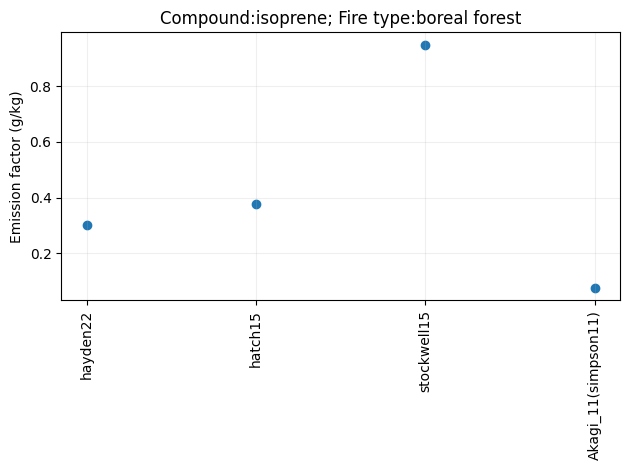

In [14]:
nv.plot_ef('isoprene','boreal forest', 'processed ef' )

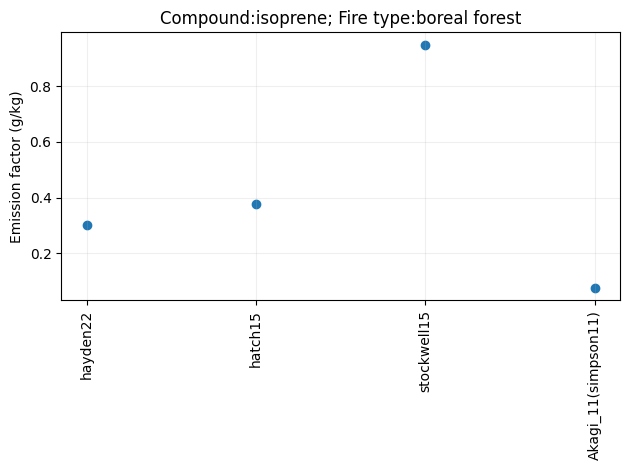

In [16]:
nv.plot_ef('isoprene','boreal forest', 'processed ef' )

**3.5 Querying speciation of the model surrogates**

In [17]:
nv.model_surrogates('S07')

array(['ACYE', 'NROG', 'ETHE', 'HCHO', 'ALK1', 'MEOH', 'OLE1', 'ALK3',
       'CCHO', 'ALK2', 'ALK5', 'FACD', 'OLE2', 'MACR', 'GLY', 'RCHO',
       'ACET', 'AACD', 'ALK4', 'ARO2', 'ISOP', 'PACD', 'IPRD', 'MVK',
       'MGLY', 'MEK', 'RNO3', 'BENZ', 'ARO1', 'BACL', 'PRD2', 'CRES',
       'BALD', 'TERP', 'AFG3', None], dtype=object)

In [19]:
nv.speciation_profile('savanna','S07','ARO2')

,formula,smile,AVG_savanna,S07,cstar,kOH
111,C4H4O,C1=COC=C1,0.335100,ARO2,9.699974,4.050000e-11
213,C5H6O,CC1=COC=C1,0.012000,ARO2,9.255552,8.730000e-11
214,C5H6O,CC1=CC=CO1,0.229600,ARO2,8.064796,7.310000e-11
336,C6H8O,CC1=CC=C(O1)C,0.273800,ARO2,6.371742,1.250000e-10
453,C8H10,CC1=CC=C(C=C1)C,0.001492,ARO2,7.444023,1.430000e-11
454,C8H10,CC1=CC(=CC=C1)C,0.005398,ARO2,7.510558,2.310000e-11
455,C8H10,CC1=CC=CC=C1C,0.012909,ARO2,7.608840,1.360000e-11
599,C9H12,CCC1=CC=CC(=C1)C,0.011238,ARO2,7.170015,1.860000e-11
600,C9H12,CCC1=CC=C(C=C1)C,0.006743,ARO2,7.104600,1.110000e-11
601,C9H12,CCC1=CC=CC=C1C,0.006743,ARO2,7.270174,1.190000e-11
